# 第七讲 Python文件-陈浩然

## 文件的概念和作用

文件是存储在长期存储设备上的一段数据，其特点是所存信息可以长期、多次使用，不会因为断电而消失

程序中使用的数据都是暂时的，当程序终止时就会丢失，为了能够永久的保存程序中的数据，需要将它们存储到长期存储设备上的文件中

长期存储设备包括：硬盘，U盘，移动硬盘，光盘...

## 文件种类

### 文本文件
可以使用文本编辑器查看，能够显示有意义的文本内容
例如，txt文件，python源文件

### 二进制文件
不能使用文本编辑器查看，只能使用专用软件查看
例如，图片，音频，视频，word文件

注意：计算机并不区分二进制文件和文本文件，都是以二进制格式存储到磁盘。文本IO是在二进制IO基础上增加了相应的字符编解码处理

## 操作文件的一般步骤

1. 打开文件
2. 读写文件
   读-将文件内容读入内存
   写-将内存数据写入文件
3. 关闭文件

## 操作文件的Python函数和方法

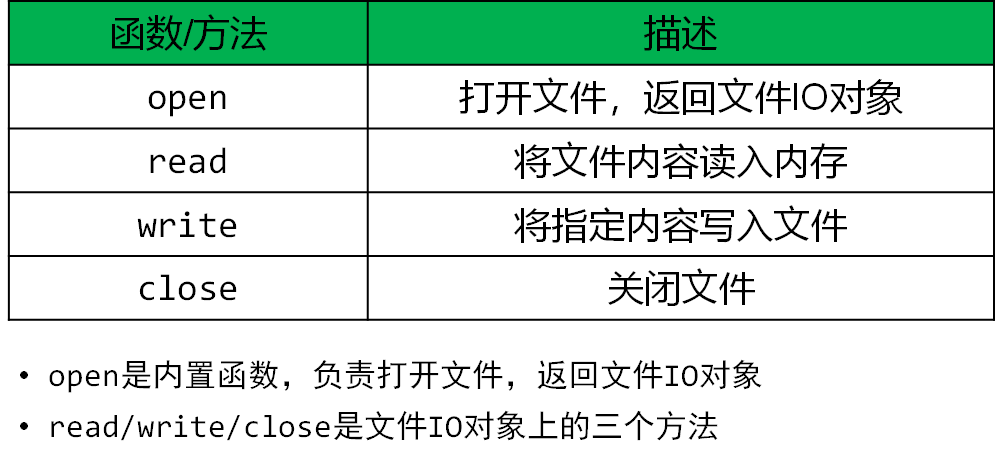

### 打开文件

### 读取文件

In [21]:
file = open('./datas/test.txt') #open()函数接受的第一个参数是将要打开的文件名，文件名有绝对文件名和相对文件名两种
#file = open('C:\\src\\test.txt')
#file = open(r'C:\src\test.txt')
print(file)

<_io.TextIOWrapper name='./datas/test.txt' mode='r' encoding='cp936'>


## 文件指针

In [22]:
# 1. 打开文件
file = open('./datas/test.txt') # 忘记关闭文件，会造成资源泄漏，并影响后续对文件的正常访问
# 2. 读取文件的所有内容
text = file.read()
print(text)
# 3. 关闭文件 
file.close() # file.close() #为避免忘记关闭文件，通常先编写打开和关闭文件的代码，再编写中间的读/写代码

python
django
numpy



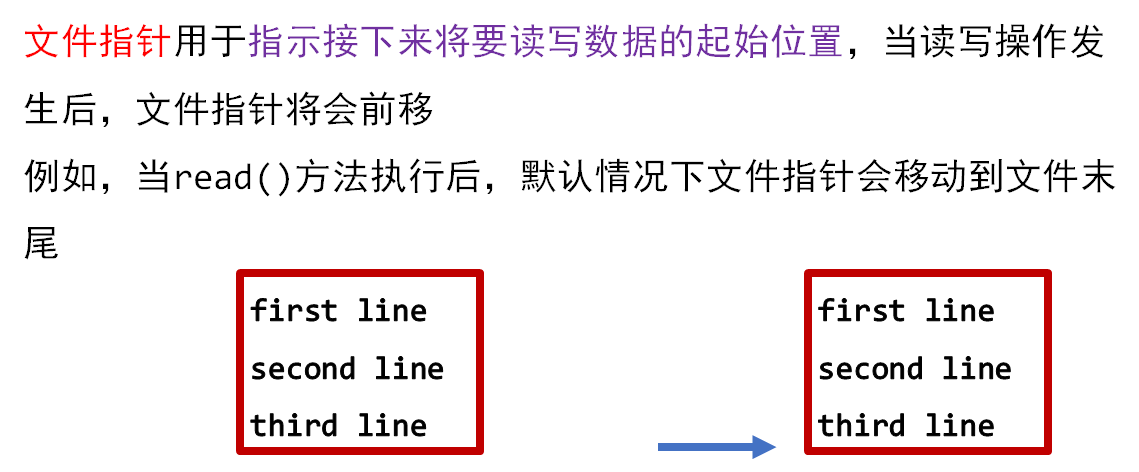

In [24]:
file = open('./datas/test.txt')
print(file)
text = file.read()
print(text)
print('-' * 15)
text = file.read()
print(text)
file.close()

<_io.TextIOWrapper name='./datas/test.txt' mode='r' encoding='cp936'>
python
django
numpy

---------------



思考： 调用一次read()方法之后，再调用一次，还能读出内容吗？

## 文件打开模式

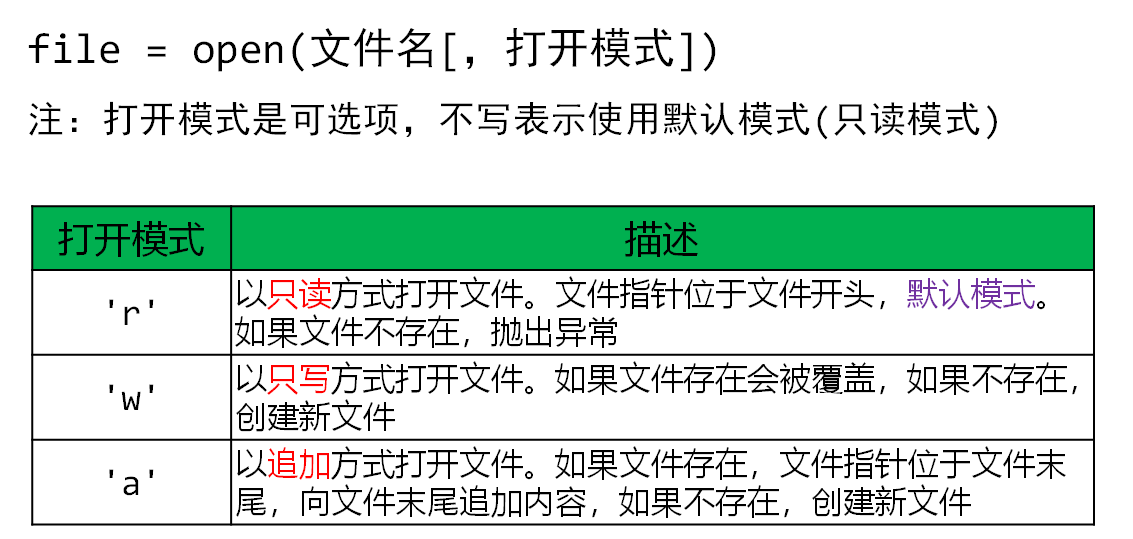

## 写入文件

write()方法将字符串写入文件中，文件必须以只写'w'或追加'a'模式打开，write()方法才能正确写入，否则会报错

In [28]:
file = open('./datas/test.txt', 'w')
print(file)
print('-' * 15)
file.write('python\n')
file.write('django\n')
file.write('numpy\n')
file = open('./datas/test.txt', 'r')
text = file.read()
print(text)
print('-' * 15)
file.close()


<_io.TextIOWrapper name='./datas/test.txt' mode='w' encoding='cp936'>
---------------
python
django
numpy

---------------


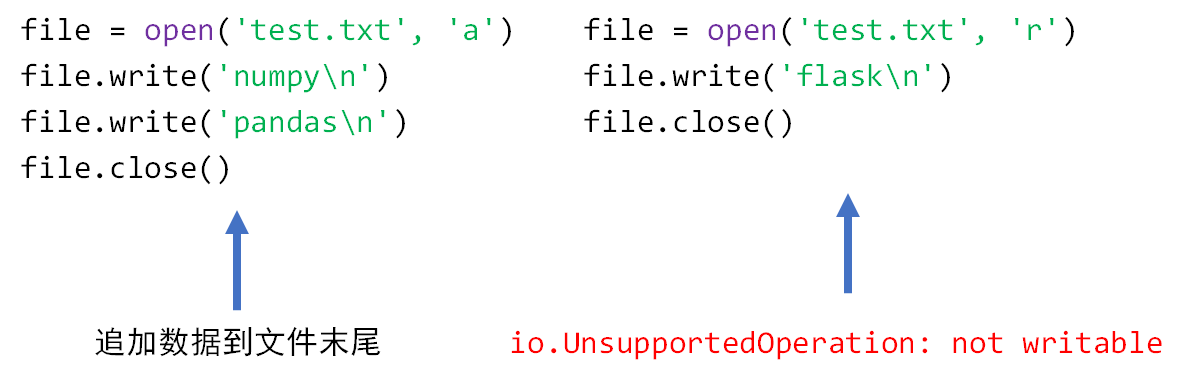

## 按行读取文件

read()方法默认会一次性读取文件的所有内容，如果文件太大，会占用太多内存

readline()方法一次读取一行内容，节省内存，方法执行后文件指针移到下一行

In [30]:
file = open('./datas/test.txt')

while True:
    #读取一行内容
    text = file.readline()
    
    #判断是否到文件末尾
    if not text:
        break
    
    #每行内容末尾已经包含了'\n'
    print(text, end='')

file.close()

python
django
numpy


In [31]:
file = open('./datas/test.txt')

for line in file:
    #每行内容末尾已经包含了'\n'
    print(line, end='')

file.close()


python
django
numpy


使用for循环可以更方便的按行读取文件

### 案例8-1  搜索文件

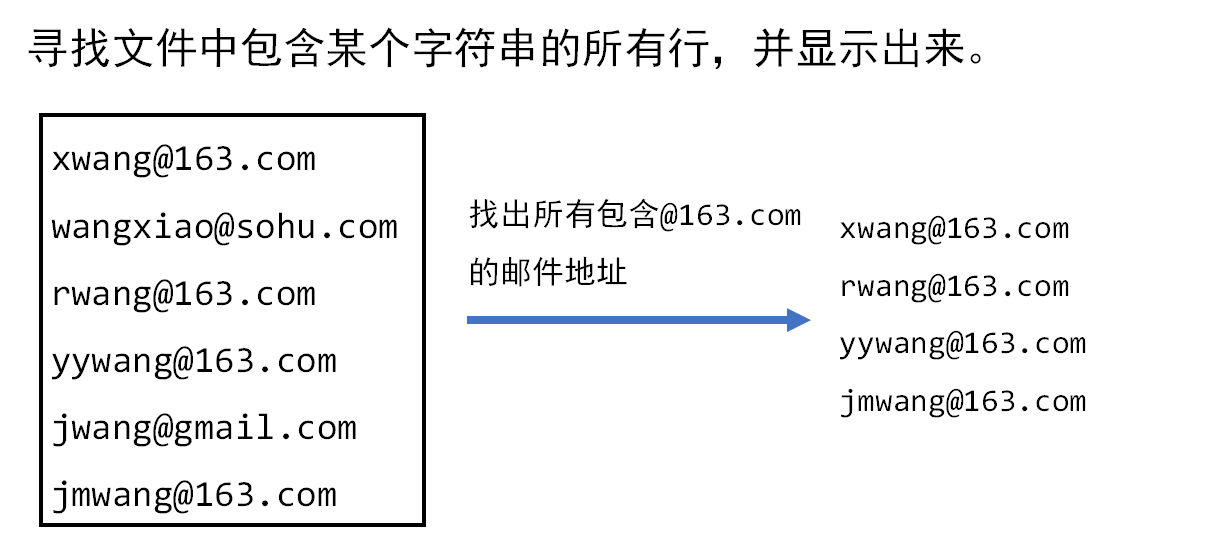

In [32]:
file = open('./datas/emails.txt')

for line in file:
    line = line.strip()
    if line.find('@163.com') == -1: 
        continue
    print(line)

file.close()

xwang@163.com
rwang@163.com
yywang@163.com
jmwang@163.com


### 案例8-2 复制小文件

编写程序，实现文件复制的过程

思路：
打开已有文件，读取全部内容，写入到另一个文件中

In [34]:
file_src = open('./datas/test_src.txt')
file_dst = open('./datas/test_dst.txt', 'w')

text = file_src.read()
file_dst.write(text)

file_src.close()
file_dst.close()


### 案例8-3 复制大文件

编写程序，实现大文件复制的过程

思路：
打开已有文件，逐行读取文件内容，并按顺序写入到另一个文件中

In [7]:
file_src = open('./datas/test_src.txt')
file_dst = open('./datas/test_dst.txt', 'w')

for line in file_src:
    file_dst.write(line)

file_src.close()
file_dst.close()

### 案例8-4 统计文件中的字符个数

编写程序，统计每个字母的出现次数，字母不区分大小写

思路：
创建一个包含26个整数值的列表counts，每个值对应每个字母的出现次数。counts[0]统计字母a的出现次数，counts[1]统计字母b的出现次数，以此类推

In [35]:
def count_letters(line, counts):
    for ch in line:
        if ch.isalpha():
            counts[ord(ch) - ord('a')] += 1

file = open("./datas/stats.txt")

counts = [0] * 26

for line in file:
    count_letters(line.lower(), counts)
  
for i in range(len(counts)):
    if counts[i] != 0:
        print(chr(ord('a') + i) + ' appears ' + str(counts[i]) +
              (' time' if counts[i] == 1 else ' times'))
file.close()

a appears 53 times
b appears 21 times
c appears 17 times
d appears 17 times
e appears 92 times
f appears 12 times
g appears 11 times
h appears 31 times
i appears 53 times
k appears 2 times
l appears 33 times
m appears 16 times
n appears 42 times
o appears 43 times
p appears 22 times
r appears 33 times
s appears 46 times
t appears 79 times
u appears 21 times
v appears 5 times
w appears 4 times
x appears 6 times
y appears 17 times
z appears 1 time


## 使用os模块管理文件/目录

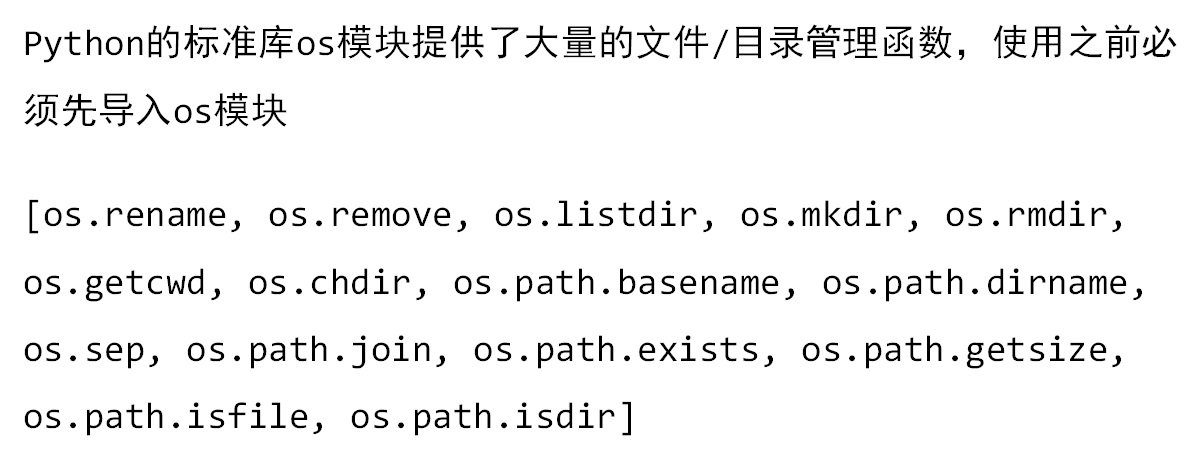

## 目录管理

os.listdir([path]) 返回指定路径path下的文件和目录的列表

不指定path参数时，返回当前路径下的文件和目录列表

In [36]:
import os
os.listdir()

['.ipynb_checkpoints',
 'datas',
 'demo',
 'Untitled.ipynb',
 '第一讲（第一部分）：初始Python.ipynb',
 '第一讲（第二部分）：Python海龟绘图Turtle库.ipynb',
 '第七讲：Python文件.ipynb',
 '第三讲：Python分支结构-上课.ipynb',
 '第三讲：Python分支结构.ipynb',
 '第九讲：Python 元组.ipynb',
 '第二讲：Python基础知识.ipynb',
 '第五讲：Python函数基础 - 上课.ipynb',
 '第五讲：Python函数基础.ipynb',
 '第八讲：Python列表 - 上课.ipynb',
 '第八讲：Python列表.ipynb',
 '第六讲：Python字符串 - 上课.ipynb',
 '第六讲：Python字符串.ipynb',
 '第十一讲：datatime模块与正则化re.ipynb',
 '第十三讲：Python类.ipynb',
 '第十二讲：Pytorch模块与深度学习.ipynb',
 '第十四讲：Python办公之Excel篇.ipynb',
 '第十讲：Python字典.ipynb',
 '第四讲：Python循环结构 - 上课.ipynb',
 '第四讲：Python循环结构.ipynb',
 '课件PDF']

In [37]:
os.listdir('E:\DeskTop\学习')

['MATLAB计算机视觉与深度学习实战.pdf', '吴恩达MLY', '图灵Python', '黄自元']

os.getcwd()返回当前工作目录

os.chdir(path)用于改变当前工作目录到指定路径path

In [38]:
os.getcwd()

'C:\\Users\\CHR\\Python课件-陈浩然\\课件01'

In [39]:
os.chdir('C:\\Users\\CHR\\Python课件-陈浩然')

In [41]:
os.getcwd()

'C:\\Users\\CHR\\Python课件-陈浩然'

os.mkdir(path)用于创建目录，如果目录有多级，则创建最后一级，如果最后一级目录的上级目录有不存在的，则会抛出OSError

os.rmdir(path)用于删除指定路径的目录。仅当目录为空时才可删除，否则抛出OSError

In [43]:
os.listdir()

['.ipynb_checkpoints', 'Pytorch', '数据结构与算法-清华', '课件01', '课件02-精简', '课件03-陈浩然']

In [44]:
os.mkdir('demo')
os.listdir()

['.ipynb_checkpoints',
 'demo',
 'Pytorch',
 '数据结构与算法-清华',
 '课件01',
 '课件02-精简',
 '课件03-陈浩然']

In [45]:
 os.rmdir('demo')

In [46]:
os.listdir()

['.ipynb_checkpoints', 'Pytorch', '数据结构与算法-清华', '课件01', '课件02-精简', '课件03-陈浩然']

## 文件管理

os.rename(src, dst)用于重命名文件或目录，从src到dst，如果dst存在，则抛出OSError

os.remove(path)用于删除指定路径的文件。如果指定路径是目录，则抛出OSError

In [50]:
os.listdir('.')

['.ipynb_checkpoints',
 'hello.txt',
 'Pytorch',
 '数据结构与算法-清华',
 '课件01',
 '课件02-精简',
 '课件03-陈浩然']

In [51]:
os.rename('hello.txt', 'demo.txt')

In [52]:
os.listdir()

['.ipynb_checkpoints',
 'demo.txt',
 'Pytorch',
 '数据结构与算法-清华',
 '课件01',
 '课件02-精简',
 '课件03-陈浩然']

In [54]:
os.remove('demo.txt')

In [55]:
os.listdir()

['.ipynb_checkpoints', 'Pytorch', '数据结构与算法-清华', '课件01', '课件02-精简', '课件03-陈浩然']

## 路径管理

os.sep表示文件路径的分隔符，在Linux中，os.sep是/，在Windows中，os.sep是\

os.path.join(path, *paths)使用平台相关的路径分隔符把路径连接起来

os.path.exists(path)判断文件或目录是否存在

In [56]:
os.sep

'\\'

In [57]:
'C:\\Windows' + os.sep + 'Readme.txt'

'C:\\Windows\\Readme.txt'

In [58]:
os.path.join('C:\\', 'Windows', 'Readme.txt')

'C:\\Windows\\Readme.txt'

In [60]:
os.path.exists('C:\\Windows')

False

## 文件属性

os.path.getsize(path)用于返回指定路径下文件的大小，以字节为单位

os.path.isfile(path)用于判断指定路径是否是文件

os.path.isdir(path)用于判断指定路径是否是目录

In [61]:
os.path.getsize('C:\\Windows\win.ini')

167

In [62]:
os.path.isfile('C:\\Windows\win.ini')

True

In [63]:
os.path.isdir('C:\\Windows')

True

### 案例8-5 txt文件中学生成绩排序

In [3]:
##读取文件，read， write，append
def read_file():
    result = []
    with open("./datas/P012_student_grade_input.txt", encoding='UTF-8') as fin:
        for line in fin:
            line = line[:-1]
            result.append(line.split(","))
    return result

#读取数据
student_datas = read_file()
print("read_file datas:",student_datas)
#排序数据
def sort_grades(datas):
    return sorted(datas,
                  key=lambda x:int(x[2]),
                  reverse=True)
student_datas = sort_grades(student_datas)
print("sort_grade datas:", student_datas)

#写出文件
def write_file(datas):
    with open("./datas/P012_student_grade_output.txt","w",encoding='UTF-8') as fout:
        for data in datas:
            fout.write(",".join(data)+"\n")
write_file(student_datas)
#关闭文件写出文件
#student_datas.close()

read_file datas: [['101', '小张', '88'], ['102', '小王', '77'], ['103', '小李', '99'], ['104', '小赵', '66'], ['105', '小刘', '55']]
sort_grade datas: [['103', '小李', '99'], ['101', '小张', '88'], ['102', '小王', '77'], ['104', '小赵', '66'], ['105', '小刘', '55']]


### 案例8-6 计算txt文件中最高，最低和平均成绩

In [7]:
def compute_score():
    scores = []
    with open("./datas/P012_student_grade_input.txt", encoding = 'UTF-8') as fin:
        for line in fin:
            line =line[:-1]
            fields = line.split(",")
            print(fields)
            scores.append(int(fields[-1]))
    max_score = max(scores)
    min_score = min(scores)
    avg_score = round(sum(scores)/len(scores),2)
    return max_score,min_score,avg_score
max_score,min_score,avg_score = compute_score()
print(f"max_score={max_score},min_score={min_score},avg_score={avg_score}")

['101', '小张', '88']
['102', '小王', '77']
['103', '小李', '99']
['104', '小赵', '66']
['105', '小刘', '55']
max_score=99,min_score=55,avg_score=77.0


### 案例8-6 统计文件的单词出现的次数

In [3]:
# -- coding: utf-8 --

word_count={}
with open("./datas/stats.txt") as fin:
    for line in fin:
        line=line[:-1]
        words = line.split()
        for word in words:
            if word not in word_count:
                word_count[word] = 0
            word_count[word] += 1
print(sorted(
        word_count.items(),
        key = lambda x: x[1],
        reverse = True
    )[1:10]
      )

[('better', 8), ('than', 8), ('to', 5), ('the', 5), ('of', 3), ('Although', 3), ('be', 3), ('should', 2), ('never', 2)]


### 案例8-7 统计文件的大小

In [11]:
import os
print(os.path.getsize("./datas/Beginner guide to Python.txt"))

sum_size = 0

for file in os.listdir():
    if os.path.isfile(file):
       sum_size += os.path.getsize(file)

print("all size of dir:", sum_size/1000)

1346
all size of dir: 10477.345


### 案例8-8 整理文件，把相同的后缀的文件放到同一个文件夹

In [2]:
# -- coding: utf-8 --
import os  
import shutil

dir = "E:/DeskTop/马后玲/武汉"

for file in os.listdir(dir):
    ext = os.path.splitext(file)[1]
    ext = ext[1:]
    if not os.path.isdir(f"{dir}/{ext}"):
        os.mkdir(f"{dir}/{ext}")
    source_path = f"{dir}/{file}"
    print(source_path)
    target_path = f"{dir}/{ext}/{file}"
    print(target_path)
    shutil.move(source_path, target_path)
    print(file, ext)

E:/DeskTop/马后玲/武汉/py
E:/DeskTop/马后玲/武汉//py
py 
E:/DeskTop/马后玲/武汉/txt
E:/DeskTop/马后玲/武汉//txt
txt 
E:/DeskTop/马后玲/武汉/xlsx
E:/DeskTop/马后玲/武汉//xlsx
xlsx 


### 案例8-9 递归搜索目录，寻找最大文件

In [14]:
import os
search_dir ="E:/DeskTop/教学/python课程设计"

result_files =[]
for root,dir,files in os.walk(search_dir):
    for file in files:
        file_path = f"{root}/{file}"
        result_files.append((file_path,
                             os.path.getsize(file_path)/1000), )
print(
    sorted(result_files,
            key = lambda x:x[1],
            reverse = True)[1:10]
    )

[('E:/DeskTop/教学/python课程设计\\Python学习视频/44.抓取与分析接口返回数据_6.mp4', 268884.395), ('E:/DeskTop/教学/python课程设计\\Python学习视频/44.抓取与分析接口返回数据_4.mp4', 264926.053), ('E:/DeskTop/教学/python课程设计\\Python学习视频/29-爬虫结合django完成职位搜索网站_1.wmv', 256400.102), ('E:/DeskTop/教学/python课程设计\\Python学习视频/44.抓取与分析接口返回数据_5.mp4', 254602.744), ('E:/DeskTop/教学/python课程设计\\Python学习视频/44.抓取与分析接口返回数据_3.mp4', 236272.305), ('E:/DeskTop/教学/python课程设计\\Python学习视频/44.抓取与分析接口返回数据_2.mp4', 233749.364), ('E:/DeskTop/教学/python课程设计\\Python学习视频/38.Django框架与工程项目创建_2.mp4', 196714.518), ('E:/DeskTop/教学/python课程设计\\Python学习视频/38.Django框架与工程项目创建_4.mp4', 180990.79), ('E:/DeskTop/教学/python课程设计\\Python学习视频/49.Django admin后台管理系统_2.mp4', 175657.526)]


### 案例8-10 计算每个班的各科最高分最低分平均分

In [ ]:
# -- coding: utf-8 --
# key:course, value: grade list
course_grades = {}

with open("/datas/P018_course_student_grade_input.txt",encoding='UTF-8') as fin:
    for line in fin:
        line = line[:-1]
        course, sno, sname, grade = line.split("，")
        if course not in course_grades:
           course_grades[course] = []
        course_grades[course].append(int(grade))
for course, grades in course_grades.items():
    print(
        course,
        max(grades),
        min(grades),
        sum(grades)/len(grades)
    )

### 案例8-11 实现不同文件的关联

In [ ]:
# -- coding: utf-8 --

course_teacher_map = {}
with open("./datas/P019_course_teacher.txt", encoding='UTF-8') as fin:
    for line in fin:
        line = line[:-1]
       # print(line)
        course, teacher = line.split(",")
        course_teacher_map[course] = teacher
    #print(course_teacher_map)
datas = []
#print(course_teacher_map)
with open("./datas/P018_course_student_grade_input.txt", encoding='UTF-8') as fin:
    for line in fin:
        line = line[:-1]
        #print(line)
        course, sno, sname, sgrade = line.split("，")
        teacher = course_teacher_map.get(course)
        datas.append([course, teacher, sno, sname, sgrade])
        print(course, teacher, sno, sname, sgrade)

def write_file(datas):
    with open("./datas/P019_merge_output.txt","w",encoding='UTF-8') as fout:
        for data in datas:
            fout.write(",".join(data)+"\n")
write_file(datas)

### 案例8-12 实现批量TXT文件的合并

In [15]:
# -- coding: utf-8 --
import os
data_dir = "./Datas/many_texts"

contents = []
for file in os.listdir(data_dir):
    file_path = f"{data_dir}/{file}"
    if os.path.isfile(file_path) and file.endswith(".txt"):
        with open(file_path, encoding='UTF-8') as fin:
             contents.append(fin.read())


final_content = "\n".join(contents)
with open("./datas/many_texts.txt","w", encoding='UTF-8') as fout:
    fout.write(final_content)

### 案例8-13 统计每个兴趣的学生人数

In [16]:
# -- coding: utf-8 --

like_count = {}

with open("./datas/student_like.txt", encoding='UTF-8') as fin:
     for line in fin:
         line = line[:-1]
         sname, likes = line.split(" ")
         like_list = likes.split("，")

         for like in like_list:
             if like not in like_count:
                 like_count[like] = 0
             like_count[like] += 1
print(like_count)


{'篮球': 4, '羽毛球': 3, '乒乓球': 3, '台球': 4, '足球': 2}


In [8]:
I = ['篮球','羽毛球']
print(type(I))
I.append("足球")
print(I)

<class 'list'>
['篮球', '羽毛球', '足球']


In [7]:
s = 'a b c'

s = s.split(' ')
print(s,type(s))

['a', 'b', 'c'] <class 'list'>
